<a href="https://colab.research.google.com/github/jsleocadio/Artificial-Intelligence/blob/main/Generative_Adversarial_Networks_Handwritten_Digits_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jefferson dos Santos Leocadio

**Author:** [Renato Candido](https://realpython.com/team/rcandido/)<br>
**Source:** [Real Python](https://realpython.com/generative-adversarial-networks/#training-the-models_1)
***

# What Are Generative Adversarial Networks?
**Generative adversarial networks** are machine learning systems that can learn to mimic a given distribution of data. They were first proposed in a 2014 [NeurIPS paper](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf) by deep learning expert Ian Goodfellow and his colleagues.

GANs consist of two neural networks, one trained to generate data and the other trained to distinguish fake data from real data (hence the “adversarial” nature of the model). Although the idea of a structure to generate data isn’t new, when it comes to image and video generation, GANs have provided impressive results such as:

* Style transfer using [CycleGAN](https://github.com/junyanz/CycleGAN/), which can perform a number of convincing style transformations on images
* Generation of human faces with [StyleGAN](https://en.wikipedia.org/wiki/StyleGAN), as demonstrated on the website [This Person Does Not Exist](https://www.thispersondoesnotexist.com/)

Structures that generate data, including GANs, are considered **generative models** in contrast to the more widely studied **discriminative models**. Before diving into GANs, you’ll look at the differences between these two kinds of models.

# Discriminative vs Generative Models
If you’ve studied neural networks, then most of the applications you’ve come across were likely implemented using [discriminative models](https://en.wikipedia.org/wiki/Discriminative_model). Generative adversarial networks, on the other hand, are part of a different class of models known as [generative models](https://en.wikipedia.org/wiki/Generative_model).

Discriminative models are those used for most [supervised](https://en.wikipedia.org/wiki/Supervised_learning) **classification** or **regression** problems. As an example of a classification problem, suppose you’d like to train a model to classify images of handwritten digits from 0 to 9. For that, you could use a labeled dataset containing images of handwritten digits and their associated labels indicating which digit each image represents.

During the training process, you’d use an algorithm to adjust the model’s parameters. The goal would be to minimize a [loss function](https://en.wikipedia.org/wiki/Loss_function) so that the model learns the **probability distribution** of the output given the input. After the training phase, you could use the model to classify a new handwritten digit image by estimating the most probable digit the input corresponds to, as illustrated in the figure below:

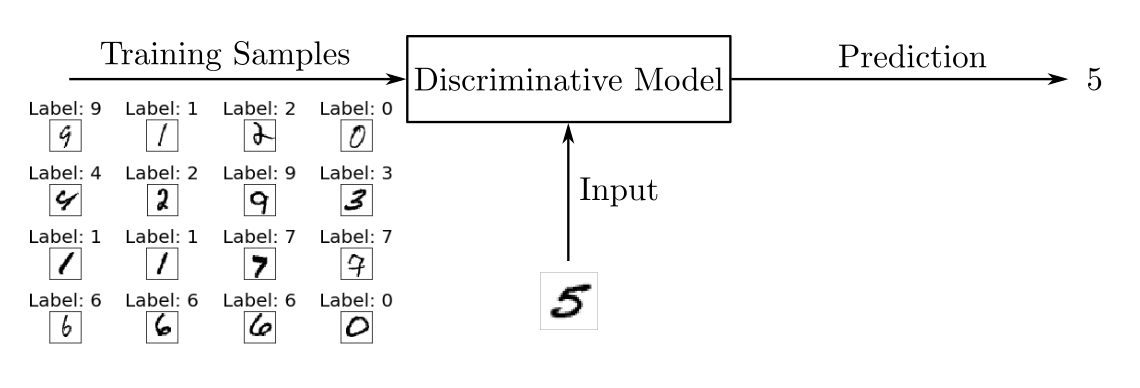

You can picture discriminative models for classification problems as blocks that use the training data to learn the boundaries between classes. They then use these boundaries to discriminate an input and predict its class. In mathematical terms, discriminative models learn the conditional probability $P(y|x)$ of the output y given the input x.

Besides neural networks, other structures can be used as discriminative models such as [logistic regression](https://realpython.com/logistic-regression-python/) models and [support vector machines](https://en.wikipedia.org/wiki/Support_vector_machine) (SVMs).

Generative models like GANs, however, are trained to describe how a dataset is generated in terms of a **probabilistic** model. By sampling from a generative model, you’re able to generate new data. While discriminative models are used for supervised learning, generative models are often used with unlabeled datasets and can be seen as a form of [unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning).

Using the dataset of handwritten digits, you could train a generative model to generate new digits. During the training phase, you’d use some algorithm to adjust the model’s parameters to minimize a loss function and learn the probability distribution of the training set. Then, with the model trained, you could generate new samples, as illustrated in the following figure:

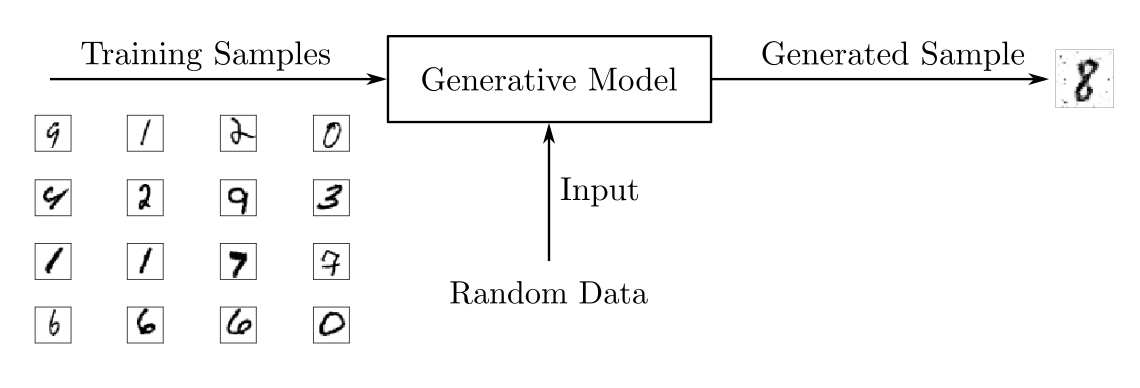

To output new samples, generative models usually consider a **stochastic**, or random, element that influences the samples generated by the model. The random samples used to drive the generator are obtained from a **latent space** in which the vectors represent a kind of compressed form of the generated samples.

Unlike discriminative models, generative models learn the probability P(x) of the input data x, and by having the distribution of the input data, they’re able to generate new data instances.

**Note:** Generative models can also be used with labeled datasets. When they are, they’re trained to learn the probability $P(x|y)$ of the input x given the output y. They can also be used for classification tasks, but in general, discriminative models perform better when it comes to classification.

You can find more information on the relative strengths and weaknesses of discriminative and generative classifiers in the article [On Discriminative vs. Generative Classifiers: A comparison of logistic regression and naive Bayes](https://papers.nips.cc/paper/2020-on-discriminative-vs-generative-classifiers-a-comparison-of-logistic-regression-and-naive-bayes).

Although GANs have received a lot of attention in recent years, they’re not the only architecture that can be used as a generative model. Besides GANs, there are various other generative model architectures such as:

* [Boltzmann machines](https://en.wikipedia.org/wiki/Boltzmann_machine)
* [Variational autoencoders](https://en.wikipedia.org/wiki/Autoencoder)
* [Hidden Markov models](https://en.wikipedia.org/wiki/Hidden_Markov_model)
* Models that predict the next word in a sequence, like [GPT-2](https://en.wikipedia.org/wiki/OpenAI#GPT-2)

However, GANs have attracted the most public interest of late due to the [exciting results](https://www.christies.com/features/A-collaboration-between-two-artists-one-human-one-a-machine-9332-1.aspx) in image and video generation.

Now that you know the basics of generative models, you’ll see how GANs work and how to train them.

# The Architecture of Generative Adversarial Networks
Generative adversarial networks consist of an overall structure composed of two neural networks, one called the **generator** and the other called the **discriminator**.

The role of the generator is to estimate the probability distribution of the real samples in order to provide generated samples resembling real data. The discriminator, in turn, is trained to estimate the probability that a given sample came from the real data rather than being provided by the generator.

These structures are called generative adversarial networks because the generator and discriminator are trained to compete with each other: the generator tries to get better at fooling the discriminator, while the discriminator tries to get better at identifying generated samples.

To understand how GAN training works, consider a toy example with a dataset composed of two-dimensional samples $(x_1, x_2)$, with $x_1$ in the interval from 0 to $2\pi$ and $x_2$ = $sin(x_1)$, as illustrated in the following figure:

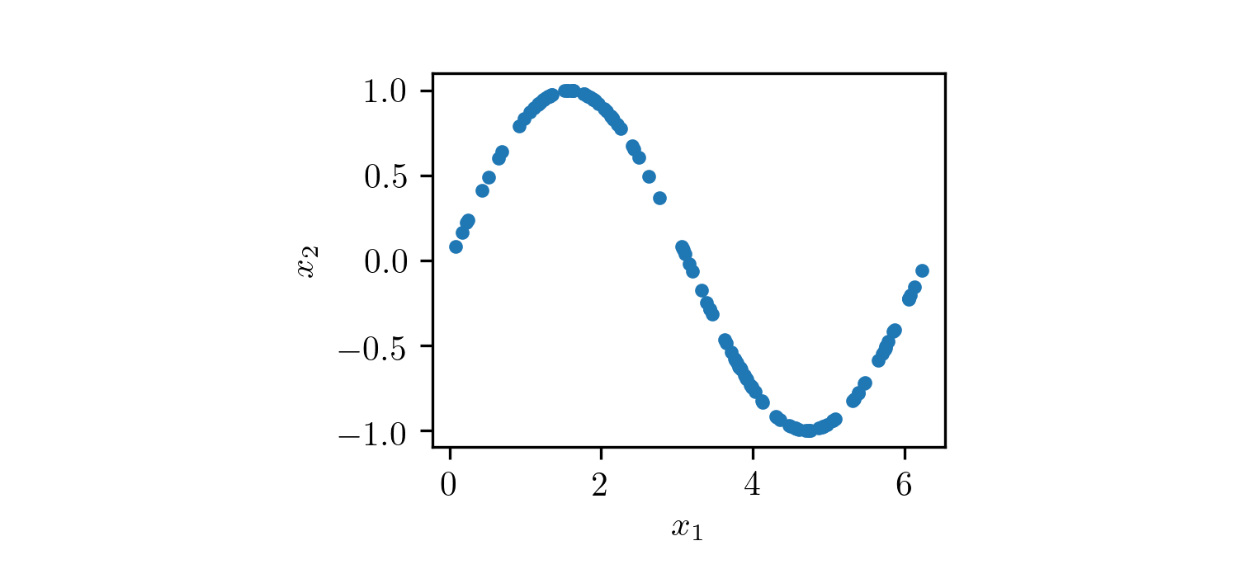

As you can see, this dataset consists of points (x₁, x₂) located over a sine curve, having a very particular distribution. The overall structure of a GAN to generate pairs (x̃₁, x̃₂) resembling the samples of the dataset is shown in the following figure:

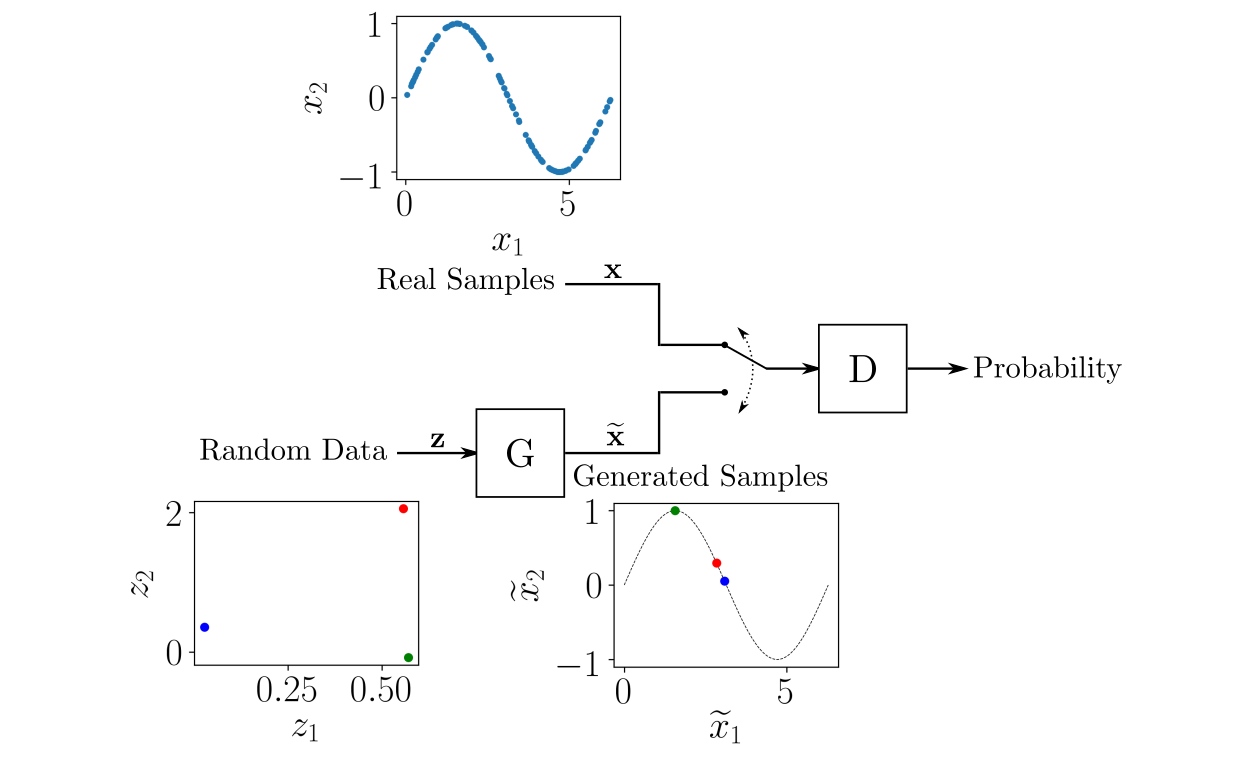

The generator G is fed with [random data](https://realpython.com/python-random/) from a latent space, and its role is to generate data resembling the real samples. In this example, you have a two-dimensional latent space, so that the generator is fed with random (z₁, z₂) pairs and is required to transform them so that they resemble the real samples.

The structure of the neural network G can be arbitrary, allowing you to use neural networks as a [multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP), a [convolutional neural network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN), or any other structure as long as the dimensions of the input and output match the dimensions of the latent space and the real data.

The discriminator D is fed with either real samples from the training dataset or generated samples provided by G. Its role is to estimate the probability that the input belongs to the real dataset. The training is performed so that D outputs 1 when it’s fed a real sample and 0 when it’s fed a generated sample.

As with G, you can choose an arbitrary neural network structure for D as long as it respects the necessary input and output dimensions. In this example, the input is two-dimensional. For a binary discriminator, the output may be a [scalar](https://en.wikipedia.org/wiki/Scalar_(mathematics)) ranging from 0 to 1.

The GAN training process consists of a two-player [minimax](https://realpython.com/python-minimax-nim/) game in which D is adapted to minimize the discrimination error between real and generated samples, and G is adapted to maximize the probability of D making a mistake.

Although the dataset containing the real data isn’t labeled, the training processes for D and G are performed in a supervised way. At each step in the training, D and G have their parameters updated. In fact, in the [original GAN proposal](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf), the parameters of D are updated k times, while the parameters of G are updated only once for each training step. However, to make the training simpler, you can consider k equal to 1.

To train D, at each iteration you label some real samples taken from the training data as 1 and some generated samples provided by G as 0. This way, you can use a conventional supervised training framework to update the parameters of D in order to minimize a loss function, as shown in the following scheme:

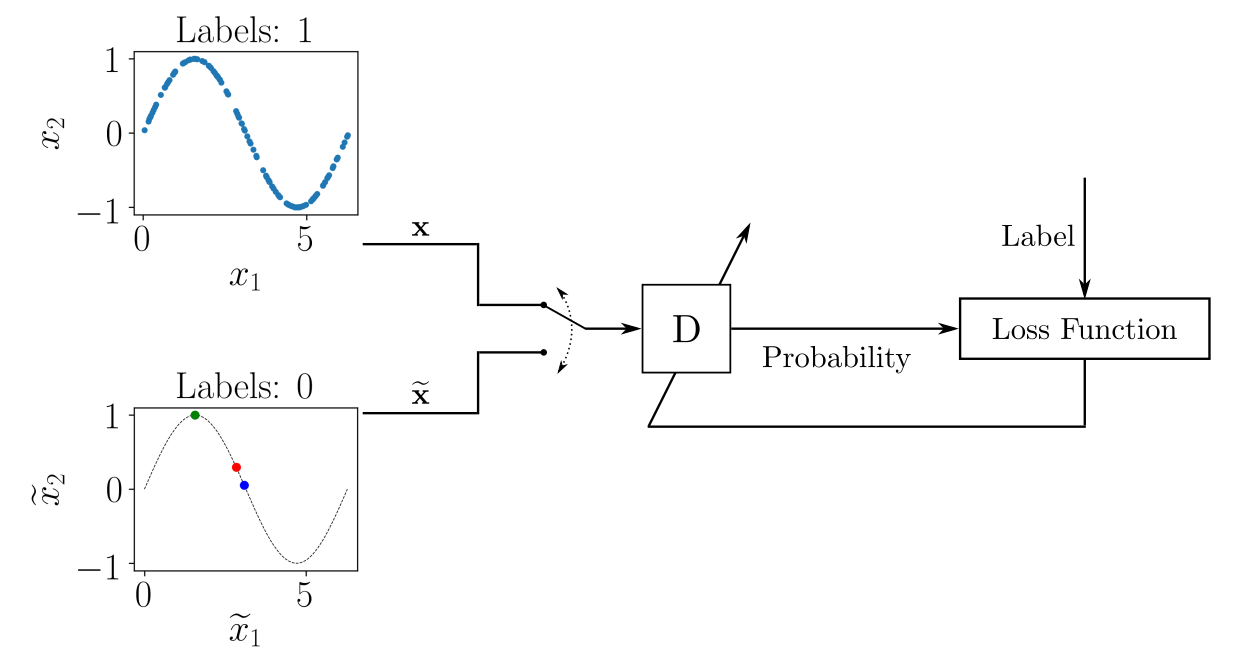

For each batch of training data containing labeled real and generated samples, you update the parameters of D to minimize a loss function. After the parameters of D are updated, you train G to produce better generated samples. The output of G is connected to D, whose parameters are kept frozen, as depicted here:

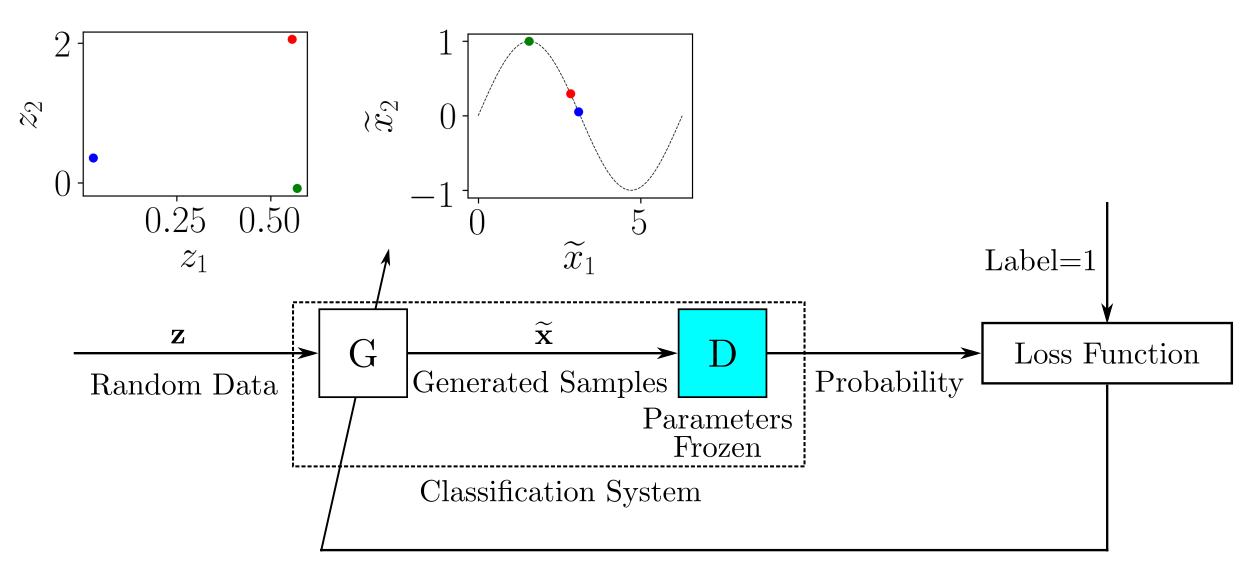

You can imagine the system composed of G and D as a single classification system that receives random samples as input and outputs the classification, which in this case can be interpreted as a probability.

When G does a good enough job to fool D, the output probability should be close to 1. You could also use a conventional supervised training framework here: the dataset to train the classification system composed of G and D would be provided by random input samples, and the label associated with each input sample would be 1.

During training, as the parameters of D and G are updated, it’s expected that the generated samples given by G will more closely resemble the real data, and D will have more trouble distinguishing between real and generated data.

Now that you know how GANs work, you’re ready to implement your own using **PyTorch**.

# Handwritten Digits Generator With a GAN [#](https://realpython.com/generative-adversarial-networks/#handwritten-digits-generator-with-a-gan)
Generative adversarial networks can also generate high-dimensional samples such as images. In this example, you’re going to use a GAN to generate images of handwritten digits. For that, you’ll train the models using the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits, which is included in the [torchvision](https://pytorch.org/docs/stable/torchvision/index.html) package.

To begin, you need to install torchvision:

In [ ]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1 MB 1.5 kB/s 
     |████████████████████████████████| 8.8 MB 31.5 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.2.0+cu92 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.2.0+cu92 which 

Begin by importing the necessary libraries:

In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

Here, you import the PyTorch library with `torch`. You also import nn just to be able to set up the neural networks in a less verbose way. Then you import math to obtain the value of the pi constant, and you import the Matplotlib plotting tools as `plt` as usual.

It’s a good practice to set up a **random generator seed** so that the experiment can be replicated identically on any machine. To do that in PyTorch, run the following code:

In [ ]:
torch.manual_seed(111)

Since this example uses images in the training set, the models need to be more complex, with a larger number of parameters. This makes the training process slower, taking about two minutes per epoch when running on [CPU](https://en.wikipedia.org/wiki/Central_processing_unit). You’ll need about fifty epochs to obtain a relevant result, so the total training time when using a CPU is around one hundred minutes.

To reduce the training time, you can use a [GPU](https://en.wikipedia.org/wiki/Graphics_processing_unit) to train the model if you have one available. However, you’ll need to manually move tensors and models to the GPU in order to use them in the training process.

You can ensure your code will run on either setup by creating a device object that points either to the CPU or, if one is available, to the GPU:

In [ ]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

Later, you’ll use this device to set where tensors and models should be created, using the GPU if available.

Now that the basic environment is set, you can prepare the training data.

## Preparing the Training Data
The MNIST dataset consists of 28 × 28 pixel grayscale images of handwritten digits from 0 to 9. To use them with PyTorch, you’ll need to perform some conversions. For that, you define transform, a function to be used when loading the data:

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

The function has two parts:

1. `transforms.ToTensor()` converts the data to a PyTorch tensor.
2. `transforms.Normalize()` converts the range of the tensor coefficients.

The original coefficients given by `transforms.ToTensor()` range from 0 to 1, and since the image backgrounds are black, most of the coefficients are equal to 0 when they’re represented using this range.

`transforms.Normalize()` changes the range of the coefficients to -1 to 1 by subtracting 0.5 from the original coefficients and dividing the result by 0.5. With this transformation, the number of elements equal to 0 in the input samples is dramatically reduced, which helps in training the models.

The arguments of `transforms.Normalize()` are two tuples, (M₁, ..., Mₙ) and (S₁, ..., Sₙ), with n representing the number of [channels](https://en.wikipedia.org/wiki/Channel_(digital_image)) of the images. Grayscale images such as those in MNIST dataset have only one channel, so the tuples have only one value. Then, for each channel i of the image, `transforms.Normalize()` subtracts Mᵢ from the coefficients and divides the result by Sᵢ.

Now you can load the training data using `torchvision.datasets.MNIST` and perform the conversions using `transform`:

In [ ]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

9920512it [00:00, 34836897.42it/s]                             


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


32768it [00:00, 841382.28it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


1654784it [00:00, 15884714.49it/s]                             

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


8192it [00:00, 200657.21it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


The argument `download=True` ensures that the first time you run the above code, the MNIST dataset will be downloaded and stored in the current directory, as indicated by the argument root.

Now that you’ve created `train_set`, you can create the data loader as you did before:

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

You can use Matplotlib to plot some samples of the training data. To improve the visualization, you can use `cmap=gray_r` to reverse the color map and plot the digits in black over a white background:

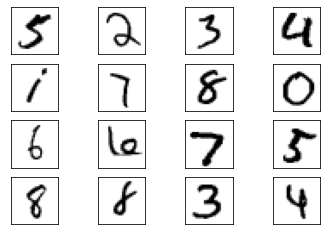

In [ ]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

As you can see, there are digits with different handwriting styles. As the GAN learns the distribution of the data, it’ll also generate digits with different handwriting styles.

Now that you’ve prepared the training data, you can implement the discriminator and generator models.

## Implementing the Discriminator and the Generator
In this case, the discriminator is an MLP neural network that receives a 28 × 28 pixel image and provides the probability of the image belonging to the real training data.

You can define the model with the following code:

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

To input the image coefficients into the MLP neural network, you [vectorize](https://en.wikipedia.org/wiki/Vectorization_(mathematics)) them so that the neural network receives vectors with 784 coefficients.

The vectorization occurs in the first line of `.forward()`, as the call to `x.view()` converts the shape of the input tensor. In this case, the original shape of the input x is 32 × 1 × 28 × 28, where 32 is the batch size you’ve set up. After the conversion, the shape of x becomes 32 × 784, with each line representing the coefficients of an image of the training set.

To run the discriminator model using the GPU, you have to instantiate it and send it to the GPU with `.to()`. To use a GPU when there’s one available, you can send the model to the device object you created earlier:

In [ ]:
discriminator = Discriminator().to(device=device)

Since the generator is going to generate more complex data, it’s necessary to increase the dimensions of the input from the latent space. In this case, the generator is going to be fed a 100-dimensional input and will provide an output with 784 coefficients, which will be organized in a 28 × 28 tensor representing an image.

Here’s the complete generator model code:

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

In **line 12**, you use the [hyperbolic tangent function](http://mathworld.wolfram.com/HyperbolicTangent.html) `Tanh()` as the activation of the output layer since the output coefficients should be in the interval from -1 to 1. In **line 20**, you instantiate the generator and send it to `device` to use the GPU if one is available.

Now that you have the models defined, you’ll train them using the training data.

## Training the Models
To train the models, you need to define the training parameters and optimizers:

In [ ]:
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

To obtain a better result, you decrease the learning rate. You also set the number of epochs to 50 to reduce the training time.

In the highlighted lines, you send the training data to device to use the GPU if available:

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device
        )
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device
        )
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.5414592623710632
Epoch: 0 Loss G.: 0.5146516561508179
Epoch: 1 Loss D.: 0.0042520551942288876
Epoch: 1 Loss G.: 7.559557914733887
Epoch: 2 Loss D.: 0.06226063147187233
Epoch: 2 Loss G.: 6.357197284698486
Epoch: 3 Loss D.: 0.03973282501101494
Epoch: 3 Loss G.: 6.055998802185059
Epoch: 4 Loss D.: 0.09155502915382385
Epoch: 4 Loss G.: 4.920107841491699
Epoch: 5 Loss D.: 0.03180582448840141
Epoch: 5 Loss G.: 5.8978776931762695
Epoch: 6 Loss D.: 0.12229234725236893
Epoch: 6 Loss G.: 3.4806573390960693
Epoch: 7 Loss D.: 0.3857848346233368
Epoch: 7 Loss G.: 2.7517409324645996
Epoch: 8 Loss D.: 0.22422565519809723
Epoch: 8 Loss G.: 2.5679547786712646
Epoch: 9 Loss D.: 0.24384523928165436
Epoch: 9 Loss G.: 1.827316164970398
Epoch: 10 Loss D.: 0.4411720037460327
Epoch: 10 Loss G.: 1.9823182821273804
Epoch: 11 Loss D.: 0.4408292770385742
Epoch: 11 Loss G.: 1.7513267993927002
Epoch: 12 Loss D.: 0.34861382842063904
Epoch: 12 Loss G.: 2.0287811756134033
Epoch: 13 Loss D.: 0.43757

Some of the tensors don’t need to be sent to the GPU explicitly with device. This is the case with generated_samples in **line 11**, which will already be sent to an available GPU since `latent_space_samples` and `generator` were sent to the GPU previously.

Since this example features more complex models, the training may take a bit more time. After it finishes, you can check the results by generating some samples of handwritten digits.

## Checking the Samples Generated by the GAN
To generate handwritten digits, you have to take some random samples from the latent space and feed them to the generator:

In [ ]:
latent_space_samples = torch.randn(batch_size, 100).to(device=device)
generated_samples = generator(latent_space_samples)

To plot `generated_samples`, you need to move the data back to the CPU in case it’s running on the GPU. For that, you can simply call `.cpu()`. As you did previously, you also need to call `.detach()` before using Matplotlib to plot the data:

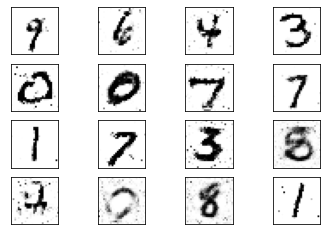

In [ ]:
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

After fifty epochs of training, there are several generated digits that resemble the real ones. You can improve the results by considering more training epochs. As with the previous example, by using a fixed latent space samples tensor and feeding it to the generator at the end of each epoch during the training process, you can visualize the evolution of the training:

![Result](https://files.realpython.com/media/fig_gan_mnist.5d8784a85944.gif)

You can see that at the beginning of the training process, the generated images are completely random. As the training progresses, the generator learns the distribution of the real data, and at about twenty epochs, some generated digits already resemble real data.